# Sentiment Analysis on Tweets about COVID19 Vaccines
[Data Source](https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets)

In [1]:
file = 'vaccination_all_tweets.csv'

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import seaborn as sns
sns.set(rc = {'figure.figsize': (5, 5)})

In [3]:
pd.read_csv(file).head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
df = pd.read_csv(file).dropna()[['date', 'text', 'hashtags', 'retweets', 'favorites']]
df.shape

(80418, 5)

In [5]:
df.head()

,date,text,hashtags,retweets,favorites
0,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],0,0
2,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",0,0
6,2020-12-12 20:06:00,"it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP",['vaccination'],0,4
9,2020-12-12 19:30:33,"#CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #Healthcare #GlobalGoals… https://t.co/MksOvBvs5w","['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']",0,0
10,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP","['PfizerBioNTech', 'Vaccine']",0,0


## Getting Sentiment with NLTK

In [6]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [7]:
df['sentiment'] = [analyzer.polarity_scores(tweet)['compound'] for tweet in df['text']]

**Separating positive and negative tweets into 2 dfs**

In [8]:
pos = df[df['sentiment'] > 0].sort_values('sentiment', ascending = False).reset_index(drop = True)
pos.head()

,date,text,hashtags,retweets,favorites,sentiment
0,2021-03-18 09:38:39,@mod_russia GOD BLESS HOLY #RUSSIA VICTORY TRIUMPH JUSTICE. GOD BLESS PRESIDENT #PUTIN. THE #ITALY PEOPLE WANTS… https://t.co/RExgEbSb9H,"['RUSSIA', 'PUTIN', 'ITALY']",0,1,0.9670
1,2021-03-18 09:41:43,GOD BLESS HOLY #RUSSIA VICTORY TRIUMPH JUSTICE. GOD BLESS PRESIDENT #PUTIN. THE #ITALY PEOPLE WANTS #SPUTNIKV TO LI… https://t.co/kbZyIPpmy2,"['RUSSIA', 'PUTIN', 'ITALY', 'SPUTNIKV']",1,2,0.9670
2,2021-08-03 11:53:52,"To the #900 heroes who took part in the #Sinopharm trial, you guys are truly wonderful and amazing! I love you alll… https://t.co/BJZOErlvm3",['Sinopharm'],0,0,0.9595
3,2021-02-26 18:21:36,Got my first dose of #Moderna today. Super easy and I feel perfectly fine. Can't wait to see and hug my friends this Summer. 🥳,['Moderna'],3,49,0.9584
4,2021-08-03 16:15:09,@ProfessorCrunk Wow this tweet put me through the loop. I love to hear it! Happy your family is well &amp; Blessed #Moderna,['Moderna'],0,0,0.9583


In [9]:
neg = df[df['sentiment'] < 0].sort_values('sentiment').reset_index(drop = True)
neg.head()

,date,text,hashtags,retweets,favorites,sentiment
0,2021-03-17 10:29:35,#SputnikV causes\nNO Harms\nNO Issues\nNO Health Warnings\nNO Health Complications\nNO Blood Clotting\nNO Deaths\n\nWhy isn… https://t.co/TNGmruPka2,['SputnikV'],0,0,-0.9682
1,2021-03-17 10:29:23,@BBCPolitics #SputnikV causes\nNO Harms\nNO Issues\nNO Health Warnings\nNO Health Complications\nNO Blood Clotting\nNO De… https://t.co/s50MhsD9Vw,['SputnikV'],0,0,-0.9682
2,2021-06-07 17:29:18,"why the fuck #Covaxin 2nd doze in delhi is so fucked up????\n\ngetting panic attacks , anxiety attacks, high blood pr… https://t.co/MTAiH6ngKu",['Covaxin'],0,0,-0.9677
3,2021-03-16 20:11:09,STOP THE MURDER!! THIS IS INSANE!!! #ModeRNA is a killer #vaccine. https://t.co/UkBWJShtPu,"['ModeRNA', 'vaccine']",0,1,-0.9599
4,2021-05-17 18:51:13,TERRIBLE TERRIBLE TERRIBLE 2 week long side effects with #Moderna 2nd shot\n\nBASTARDS AT @CDCgov = fu#king liars… https://t.co/tEsFLV7zve,['Moderna'],1,1,-0.9534


In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'D1', 'D2', 'dose', 'COVID19', 'COVID', 'vaccine', 'vaccinated', 'vaccination', 'slots', 'people', 'age'])

In [11]:
def wordcloud_generator(data, title = None):
    wordcloud = WordCloud(width = 500, height = 500,
                          background_color = 'white',
                          min_font_size = 10,
                          stopwords = stopwords
                          ).generate(" ".join(data.values))
    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title, fontsize = 20)
    plt.show()

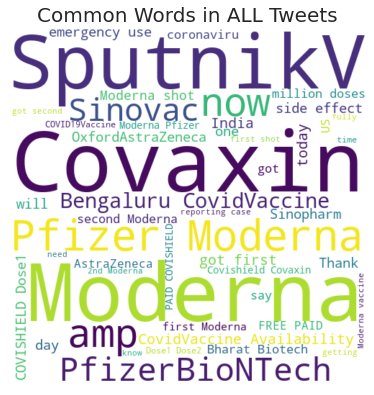

In [12]:
wordcloud_generator(data = df['text'], title = "Common Words in ALL Tweets")

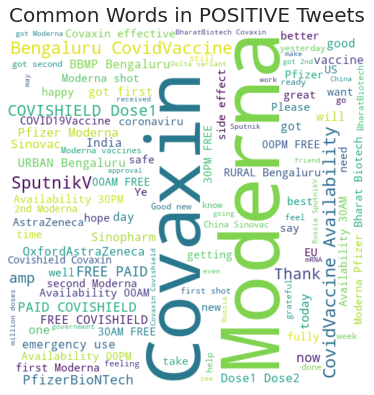

In [13]:
wordcloud_generator(data = pos['text'], title = "Common Words in POSITIVE Tweets")

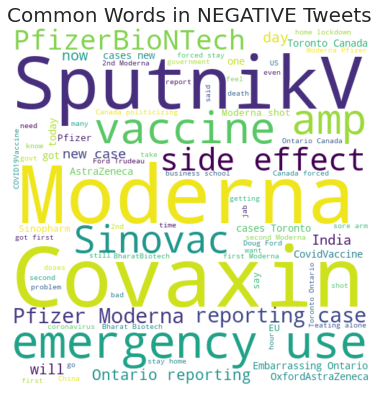

In [14]:
wordcloud_generator(data = neg['text'], title = "Common Words in NEGATIVE Tweets")

## Keyword Query

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
query = 'pfizer'

In [17]:
feature_pos = tfidf.fit_transform(pos['text'])
query_feature = tfidf.transform([query])

cosims_pos = cosine_similarity(query_feature, feature_pos).flatten()
result_pos = cosims_pos.argsort()

print('Positive Tweets for "' + query + '"')
print("==================================================\n")

for r in result_pos[-11:-1]:
  print("Sentiment Score:", pos.iloc[r]['sentiment'])
  print(pos.iloc[r]['text'])
  print('- - - - - - - - - -\n')

Positive Tweets for "pfizer"

Sentiment Score: 0.5574
Happily mixed #Pfizer and #Moderna . Got Pfizer for 1st, Moderna for 2nd 😎😎
 #FullyVaccinated #COVID19
- - - - - - - - - -

Sentiment Score: 0.296
@WHO Is it ok to mix @pfizer and @moderna_tx mRNA vaccine doses? #vaccine #Pfizer #Moderna #COVIDVaccination
- - - - - - - - - -

Sentiment Score: 0.639
GOT IT! THANKS PFIZER!
#SecondDose
#Pfizer #PfizerVaccine #PfizerBioNTech https://t.co/8HV8w92kB2
- - - - - - - - - -

Sentiment Score: 0.6545
Which is the most effective vaccine? 
#Pfizer? #Moderna? #AstraZeneca?
#SputnikV?
- - - - - - - - - -

Sentiment Score: 0.3612
Ppl w/ the pfizer vaccine be like #pfizer #vaccine #moderna https://t.co/iA5k985oYd
- - - - - - - - - -

Sentiment Score: 0.25
Here's the animation I created this weekend for Pfizer's new logo #Pfizer #PfizerBiontech 

@pfizer - can we work o… https://t.co/VU4gYmotEW
- - - - - - - - - -

Sentiment Score: 0.8047
I have had the #Moderna vaccine, but, now I want the #Pfizer as

In [18]:
feature_neg = tfidf.fit_transform(neg['text'])
query_feature = tfidf.transform([query])

cosims_neg = cosine_similarity(query_feature, feature_neg).flatten()
result_neg = cosims_neg.argsort()

print('Negative Tweets for "' + query + '"')
print("==================================================\n")

for r in result_neg[-11:-1]:
  print("Sentiment Score:", neg.iloc[r]['sentiment'])
  print(neg.iloc[r]['text'])
  print('- - - - - - - - - -\n')

Negative Tweets for "pfizer"

Sentiment Score: -0.4927
So tired and so much headache. Pfizer is doing it’s job tho 👏🏽👏🏽 #Pfizer #PfizerBiontech #Vaccinatie #VaccinesWork
- - - - - - - - - -

Sentiment Score: -0.34
US FDA to add heart inflammation warning to Pfizer, Moderna #COVID19vaccines #COVID19Vaccine #Pfizer #Moderna https://t.co/l4Sn5jEbW0
- - - - - - - - - -

Sentiment Score: -0.4215
Ugh so my boss got the Pfizer and now I have to fill out this paperwork what a #Pfizer thing to do I'm a #Moderna w… https://t.co/aD1lIbYAfR
- - - - - - - - - -

Sentiment Score: -0.3818
COVID-19 vaccine: Pfizer withdraws Emergency Use Authorisation application in India #Pfizer #PfizerBioNtech https://t.co/Xr1RAfg4DK
- - - - - - - - - -

Sentiment Score: -0.0258
✨You can’t sue #Pfizer or #Moderna if you have severe #Covid19 vax side effects, like death👻
✨Pfizer &amp; Moderna have… https://t.co/mlOEHmnvrn
- - - - - - - - - -

Sentiment Score: -0.296
@vonderleyen @pfizer If only #Pfizer #PfizerBioNTec